In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# 数据预处理，将其变换为网络要求的形状，并缩放到[0, 1]之间
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
# 网络架构
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

In [7]:
# 编译，compile
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [8]:
# 准备标签
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
# fit
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2553 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1036 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0682 - acc: 0.9803
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0497 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0376 - acc: 0.9888


> loss: 网络在训练集上的损失  
acc: 网络在训练数据集上的accuracy

In [11]:
# 在测试集上评估性能
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Accuracy on test images: {:.4f}".format(test_acc))

10000/10000 [==============================] - 0s 45us/step
Accuracy on test images: 0.9793


> 测试集accuracy为98.03%，比训练集accuracy（98.89%）低不少，**过拟合**(指在新数据上的性能往往比在训练集上要差)。

## 3.1 电影评论分类：二分类问题

+ IMDB数据集

50000条严重两极化的评论，一半用于训练，一半用于测试，分别都包含一半正面评论，一半负面评论。

已经经过预处理：评论(单词序列）已经被转化为整数序列，其中每个整数代表字典中的某个单词。

In [12]:
from keras.datasets import imdb

# num_words=10000指仅保留训练数据中前10000个最长出现的单词,低频单词将被舍弃
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

> `train_data`, `test_data`这两个变量是评论组成的列表，每条评论又是单词索引组成的列表（表示一系列单词）。  
`train_labels`, `test_labels`都是0和1组成的列表，0代表负面，1代表正面。

In [13]:
 train_data.shape

(25000,)

In [14]:
train_data[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [15]:
# 单词索引不会超过10000，因为限定为前10000个最常见的单词
max(max(sequence) for sequence in train_data)

9999

In [16]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

+ 准备数据

**将列表转换为张量**。方法有二：
1. 填充列表，使其具有相同的长度，再将列表转换成形状为(samples, word_indices)的整数张量，然后网络第一层可以使用能处理这种整数张量的层（即`Embedding`层）；
2. 对列表进行one-hot编码，将其转换为0和1组成的向量。然后网络第一层可以使用`Dense`层。

In [17]:
# 将整数序列编码为二进制矩阵
def vectorize_sequences(sequences, dimensions=10000):
    # 创建结果矩阵，shape=(len(sequences), dimensions)
    results = np.zeros((len(sequences), dimensions))
    # 该位置单词出现，则为1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train.shape

(25000, 10000)

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

+ 构建网络

In [23]:
# 定义模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

+ 编译模型

In [24]:
# 编译模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

可以自定义这三个参数：

In [25]:
# 配置optimizer，传入一个optimizer实例
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
# 使用自定义loss和metrics，传入函数对象
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

+ 验证

将原始训练集保留出10000个样本作为验证集：

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# batch_size=512, epochs=20
# validation_data监控在验证集上的loss和accuracy
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

`model.fit()`有一个返回值值——`History`对象。这个对象有一个成员`history`，它是一个字典，包含训练过程中的所有数据。

In [29]:
history.history.keys()

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])

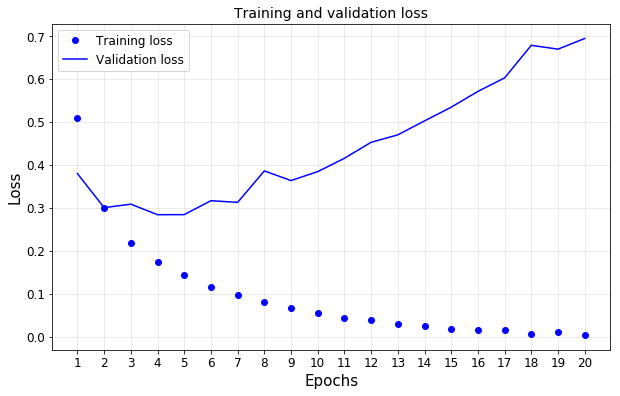

In [30]:
# 绘制训练loss和验证loss
train_loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.grid("on", alpha=0.3)
plt.xticks(range(1, len(train_loss) + 1))
plt.legend(loc='best', fontsize='large')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and validation loss", fontsize=14)
plt.show()

In [31]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

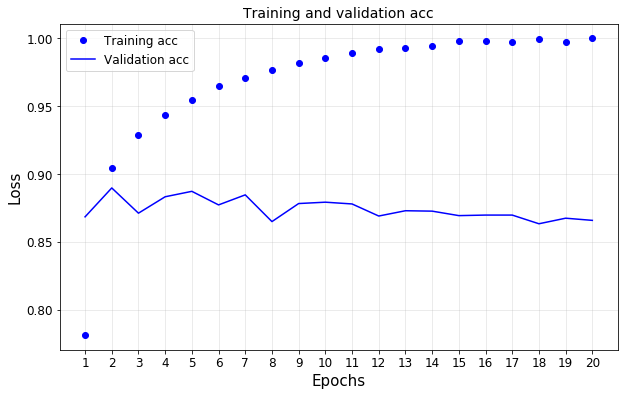

In [32]:
# 绘制训练acc和验证acc
train_acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.grid("on", alpha=0.3)
plt.xticks(range(1, len(train_loss) + 1))
plt.legend(loc='best', fontsize='large')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and validation acc", fontsize=14)
plt.show()

> **过拟合！**训练损失每轮都在降低，训练精度每轮都在提升。这是梯度下降优化的预期结果。——想要最小化的量随着每次迭代越来越小。但验证集并非如此。

In [33]:
# 训练4轮，防止过拟合
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 115us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.1679 - acc: 0.9404


In [34]:
model.metrics_names

['loss', 'acc']

In [35]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 211us/step


[0.32315462244987486, 0.87348]

In [36]:
model.predict(x_test)

array([[0.14026147],
       [0.9997029 ],
       [0.29552528],
       ...,
       [0.07234976],
       [0.04342838],
       [0.48153403]], dtype=float32)

In [37]:
len(model.predict(x_test))

25000

In [38]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(10000, 16) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'dense_7/kernel:0' shape=(16, 16) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'dense_8/kernel:0' shape=(16, 1) dtype=float32_ref>,
 <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32_ref>]

## 3.2 新闻分类： 多分类问题

+ 路透社数据集

In [39]:
from keras.datasets import reuters

# 将数据限定为前10000个最常出现的单词
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [40]:
train_data.shape

(8982,)

In [41]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [42]:
test_data.shape

(2246,)

In [43]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [44]:
train_labels[10]

3

In [45]:
# 数据预处理，与上个一样
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**标签向量化：**
1. one-hot编码（分类数据广泛使用）
2. 将标签列表转换为整数张量

In [46]:
# 将标签向量化，one-hot编码
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [47]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [48]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

`keras.utils.to_categorical()`也可以实现这个操作：

In [49]:
to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
# 定义模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [51]:
# 编译模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
# 训练模型
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 182us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


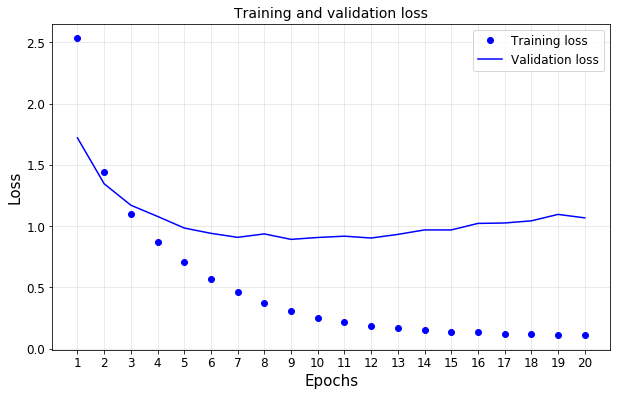

In [54]:
# 绘制训练loss和验证loss
train_loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.grid("on", alpha=0.3)
plt.xticks(range(1, len(train_loss) + 1))
plt.legend(loc='best', fontsize='large')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and validation loss", fontsize=14)
plt.show()

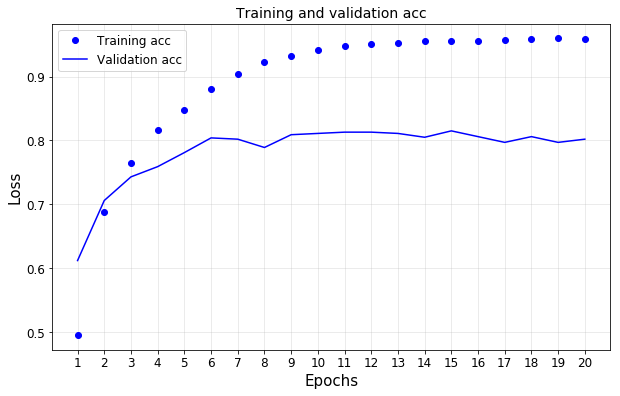

In [55]:
# 绘制训练acc和验证acc
train_acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.grid("on", alpha=0.3)
plt.xticks(range(1, len(train_loss) + 1))
plt.legend(loc='best', fontsize='large')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and validation acc", fontsize=14)
plt.show()

> 网络在训练8轮后开始过拟合。

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(x_train, one_hot_train_labels, epochs=8, batch_size=512)

Epoch 1/8
8982/8982 [==============================] - 1s 144us/step - loss: 3.2444 - acc: 0.4490
Epoch 2/8
8982/8982 [==============================] - 1s 109us/step - loss: 2.2441 - acc: 0.4127
Epoch 3/8
8982/8982 [==============================] - 1s 110us/step - loss: 1.5644 - acc: 0.3663
Epoch 4/8
8982/8982 [==============================] - 1s 108us/step - loss: 1.0632 - acc: 0.7077
Epoch 5/8
8982/8982 [==============================] - 1s 109us/step - loss: 0.7207 - acc: 0.8476
Epoch 6/8
8982/8982 [==============================] - 1s 108us/step - loss: 0.5684 - acc: 0.8832 0s - loss: 0.554
Epoch 7/8
8982/8982 [==============================] - 1s 110us/step - loss: 0.4702 - acc: 0.9038
Epoch 8/8
8982/8982 [==============================] - 1s 109us/step - loss: 0.3795 - acc: 0.9245


In [57]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 207us/step


[0.9580524335030669, 0.7853962600443476]

In [58]:
# 完全随机
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hit_array = np.array(test_labels) == np.array(test_labels_copy)
np.sum(hit_array) / len(test_labels)

0.18121104185218165

In [59]:
# 预测
predictions = model.predict(x_test)

In [60]:
predictions.shape

(2246, 46)

> 每个样本对应一个46向量，第i个值是属于第i个类别的概率。

In [61]:
predictions[0]

array([2.1361604e-08, 4.3142333e-07, 9.5980887e-08, 9.5692558e-05,
       1.6067369e-04, 2.3287383e-09, 2.0802585e-08, 1.7901550e-07,
       5.2259048e-07, 8.4867580e-09, 4.5497206e-08, 9.4760816e-07,
       1.6086464e-08, 1.6600447e-07, 3.7868013e-08, 9.1235464e-09,
       9.5263977e-07, 1.6596949e-06, 1.7368443e-07, 4.2926621e-07,
       1.4881370e-07, 2.1189514e-07, 3.4337837e-09, 2.6745619e-07,
       3.6182534e-08, 1.2544032e-07, 1.0709193e-08, 2.2636275e-08,
       2.2537579e-08, 5.9810539e-08, 2.2438930e-07, 1.9288248e-07,
       6.3357625e-08, 2.1110559e-08, 1.8892879e-07, 1.4516868e-08,
       1.1853084e-07, 4.2844249e-08, 6.7656558e-08, 2.7178618e-07,
       5.0465147e-08, 4.5728021e-07, 3.5672365e-08, 3.7674724e-08,
       5.5877059e-09, 1.6303863e-08], dtype=float32)

In [62]:
# 预测类别
np.argmax(predictions[0])

4

In [63]:
np.argmax(predictions, axis=1)

array([ 4, 10,  1, ...,  3,  4,  1], dtype=int64)

**标签向量化**——将标签列表转换为整数张量。

In [64]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [65]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [66]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=8, batch_size=512)

Epoch 1/8
8982/8982 [==============================] - 1s 146us/step - loss: 3.2332 - acc: 0.3113
Epoch 2/8
8982/8982 [==============================] - 1s 110us/step - loss: 2.3253 - acc: 0.2173
Epoch 3/8
8982/8982 [==============================] - 1s 109us/step - loss: 1.7513 - acc: 0.2546
Epoch 4/8
8982/8982 [==============================] - 1s 109us/step - loss: 1.4682 - acc: 0.5232
Epoch 5/8
8982/8982 [==============================] - 1s 111us/step - loss: 0.8446 - acc: 0.8224
Epoch 6/8
8982/8982 [==============================] - 1s 110us/step - loss: 0.6026 - acc: 0.8798
Epoch 7/8
8982/8982 [==============================] - 1s 110us/step - loss: 0.4889 - acc: 0.8997
Epoch 8/8
8982/8982 [==============================] - 1s 110us/step - loss: 0.4026 - acc: 0.9154


In [67]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 196us/step


[0.915640654780455, 0.7943009795722215]

## 3.3 预测房价：回归问题

In [68]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [69]:
train_data.shape

(404, 13)

In [70]:
test_data.shape

(102, 13)

In [71]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [72]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_data = std_scaler.fit_transform(train_data)
test_data = std_scaler.transform(test_data)

一般来说，训练数据越少，过拟合会越严重，而较小的网络可以降低过拟合。

In [73]:
# 构建网络
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

> 最后一层只有一个单元，没有激活，是一个线性层。——这是标量回归的典型设置。添加激活函数将会限制输出范围。这里最后一层是线性的，所以网络可以学会预测任意范围内的值。

In [74]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=False, random_state=42)

all_scores = []
for train_index, test_index in kf.split(train_data):
    x_train, x_val = train_data[train_index], train_data[test_index]
    y_train, y_val = train_targets[train_index], train_targets[test_index]
    
    model = build_model()
    model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
    all_scores.append(val_mae)

In [75]:
all_scores

[2.476757351714786, 2.588740058464579, 2.5466936330984136, 2.8097036274352876]

In [76]:
np.mean(all_scores)

2.6054736676782664

In [77]:
all_mae_histories = []
for train_index, test_index in kf.split(train_data):
    x_train, x_val = train_data[train_index], train_data[test_index]
    y_train, y_val = train_targets[train_index], train_targets[test_index]

    model = build_model()
    history = model.fit(x_train, y_train, epochs=500, batch_size=1, verbose=0,
                        validation_data=(x_val, y_val))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [78]:
len(all_mae_histories)

4

In [79]:
# 每一个epoch中的K折验证分数平均值
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

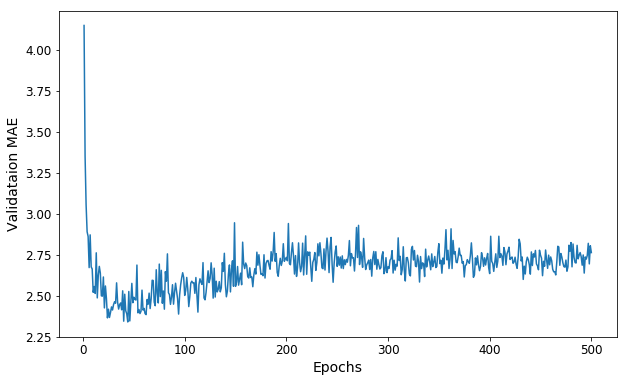

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Validataion MAE", fontsize=14)
plt.show()

纵轴的范围较大，且数据方差相对较大，所以很难看清这张图的规律。重新绘制一张：
+ 删除前10个数据点，因为它们的取值范围与曲线上的其他点不同。
+ **将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线**。

In [81]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

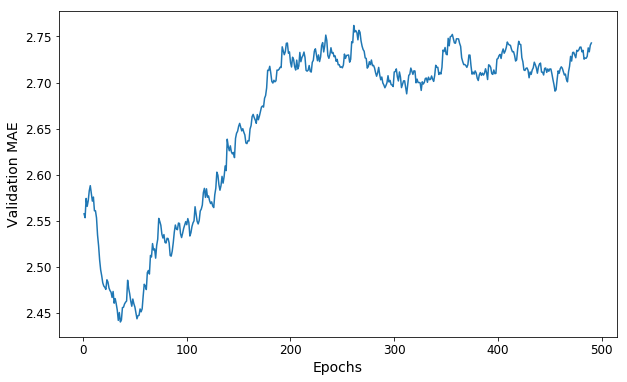

In [82]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Validation MAE", fontsize=14)
plt.show()

In [83]:
np.argmin(smooth_mae_history)

35

验证MAE在35轮后不再显著降低，之后开始过拟合。

In [92]:
model = build_model()
model.fit(train_data, train_targets, epochs=35, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [93]:
test_mae_score

2.9754228124431537